Author: Abdelmalik Moujahid -- abdelmalik.moujahid@uc3m.es

Date: March 1, 2017

<b> Solved by: Alessandro La Corte </b>
<br/>
<b> Email: 100355025@alumnos.uc3m.es </b>

# Machine Learning

## Session #3: Classifying digits with SVM

The aim of this session is to solve a real data problem using SVM implementation of scikit-learn. The problem is based on the <a href = https://en.wikipedia.org/wiki/MNIST_database>  MNIST database</a> of handwritten digits that can be loaded from <a href = http://mldata.org> mldata.org</a>.



## Required packages:

    * numy
    * matpltlib.pyplot
    * sklearn (svm, preprocessing, cross_validation, datasets, metrics)
        . mnist = datasets.fetch_mldata('MNIST original', data_home='mnist')
        . np.fmod
        . preprocessing.scale
        . cross_validation.train_test_split
    
    

The iPython Notebook should be sent using the assignment activity module (See Aula Global). The deadline for submitting your reports ends on **March 8**. **The iPython Notebook should indicate your names and your email address**.

### 1. Loading the MNIST Database and preparing the data

* Follow the intructions provided <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html> here</a> to download the MNIST database.
* Transform the data into a binary classification problem: even vs. odd digits.
* Divide the dataset into train (40,000) and test (30,000) datasets
* Check the number of even and odd digits in the training and test sets
* Visualize some individual images (Remember that each row of the dataset corresponds to an image)

Follow the intructions provided here to download the MNIST database.

In [2]:
#All imports

import matplotlib.pyplot       as plt
import numpy                   as np
import math
from sklearn.datasets          import fetch_mldata
from sklearn.neural_network    import MLPClassifier
from sklearn                   import cross_validation
from sklearn.utils             import shuffle
from sklearn.svm               import SVC
from sklearn.model_selection   import cross_val_score
from numpy                     import linalg as LA
from sklearn.preprocessing     import scale
from sklearn.model_selection   import GridSearchCV
from sklearn.metrics           import classification_report
from sklearn.metrics           import confusion_matrix
from sklearn.naive_bayes       import GaussianNB

In [3]:
#Download  of the MNIST database

mnist = fetch_mldata("MNIST original")

print mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original', 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}


Transform the data into a binary classification problem: even vs. odd digits.

In [4]:
#First, lets obtain X matrix and y vector

X = mnist['data']
y = mnist['target']

#To transform the problem into a binary classification problem
#  of even vs odds
y = y % 2

print y

[ 0.  0.  0. ...,  1.  1.  1.]


Divide the dataset into train (40,000) and test (30,000) datasets

In [5]:
#To make results reproducable
np.random.seed(42)

print X.shape #X has 70000

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=30000, random_state=42)

print X_train.shape
print X_test.shape

(70000, 784)
(40000, 784)
(30000, 784)


Check the number of even and odd digits in the training and test sets

In [59]:
# In vector y, 1 represents odd and 0 even. 
# There are only 0 and 1's in this vector

#In training set
print("Number of odd occurrences in training set: {}").format(np.sum(y_train))
print("Number of even occurrences in training set: {}").format(np.sum(1-y_train))

print("\n")
#In test set
print("Number of odd occurrences in test set: {}").format(np.sum(y_test))
print("Number of even occurrences in test set: {}").format(np.sum(1-y_test))



Number of odd occurrences in training set: 20370.0
Number of even occurrences in training set: 19630.0


Number of odd occurrences in test set: 15212.0
Number of even occurrences in test set: 14788.0


Visualize some individual images (Remember that each row of the dataset corresponds to an image)

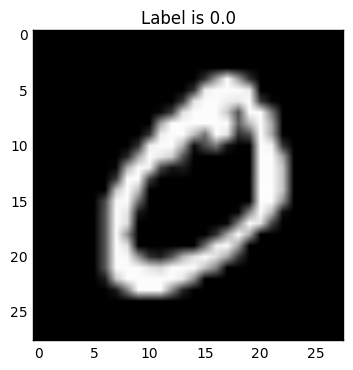

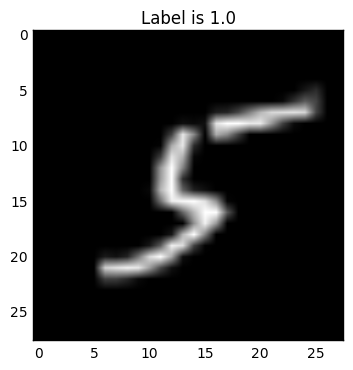

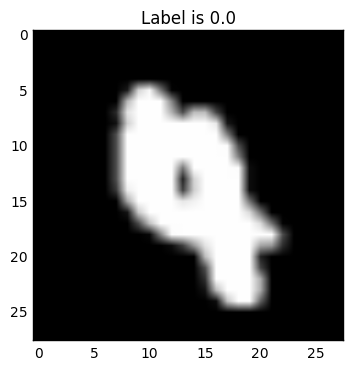

In [66]:
#Lets plot the first 5 images
for i in [0, 35000, 65000]:
    pixel = X[i].reshape((28,28))
    plt.title('Label is {label}'.format(label=y[i]))
    plt.imshow(pixel, cmap='gray')
    plt.show()

### 2. Training a Gaussian RBF SVC

On a randomly selected subset (2000 samples) of the training set, 

a) Compute the cross-validated metrics of a RBF SVC fitted with the default parameters. The simplest way to use cross-validation is to call the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score > cross_val_score</a> helper function on the estimator and the dataset.  Adopt a 5-fold cross-validation.

b) Taking into account that standardization of datasets is a common requirement for many machine learning estimators, standardize the dataset along the feature axis and repeat step (a). You should observe a clear improvement of the cross-validation scores.

c) Based on this preprocessed subset (2000 samples), use the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV > GridSearchCV</a>  function to performan an exhaustive search over specified parameters for the RBF SVC. The parameter space is given by values of gamma in the range [10^-3, 10^3], and C in the range [1, 10, 100, 1000]. Adopt a 5-fold cross-validation.

d) On the whole train data set:
* Train a single SVC with the best C and $\gamma$ obtained in the previous step

e) On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

On a randomly selected subset (2000 samples) of the training set,

In [6]:
#Obtain a random sample

np.random.seed(42)

Xtrain_sample, ytrain_sample = shuffle(X_train, y_train, random_state = 42, n_samples = 2000)

print Xtrain_sample.shape
print ytrain_sample.shape

(2000, 784)
(2000,)


Compute the cross-validated metrics of a RBF SVC fitted with the default parameters. The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset. Adopt a 5-fold cross-validation.

In [14]:
clf = SVC()

scores = cross_val_score(clf, Xtrain_sample, ytrain_sample, cv=5)

print( "The acurracy is {} +/- {}" ).format(scores.mean(), scores.std() * 2)

The acurracy is 0.504998762492 +/- 0.00156534016015


Taking into account that standardization of datasets is a common requirement for many machine learning estimators, standardize the dataset along the feature axis and repeat step (a). You should observe a clear improvement of the cross-validation scores.

In [23]:
Xstand = scale(X_train)

#Repeat the previous
np.random.seed(42)

Xtrain_sample, ytrain_sample = shuffle(Xstand, y_train, random_state = 42, n_samples = 2000)

clf = SVC()

scores = cross_val_score(clf, Xtrain_sample, ytrain_sample, cv=5)

print( "The acurracy is {} +/- {}" ).format(scores.mean(), scores.std() * 2)

The acurracy is 0.917974774842 +/- 0.0381275747206


Based on this preprocessed subset (2000 samples), use the GridSearchCV function to performan an exhaustive search over specified parameters for the RBF SVC. The parameter space is given by values of gamma in the range [10^-3, 10^3], and C in the range [1, 10, 100, 1000]. Adopt a 5-fold cross-validation.


In [33]:
gamma = [math.pow(10, -3), math.pow(10,3)]
C     = [1, 10, 100, 1000]

parameters = {'gamma':gamma, 'C':C}

svc = SVC()

clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)

clf.fit(Xtrain_sample, ytrain_sample)

print ("The best hyperparameters are {} with a score of {}").format(clf.best_params_, clf.best_score_)

The best hyperparameters are {'C': 10, 'gamma': 0.001} with a score of 0.94


 On the whole train data set:
* Train a single SVC with the best C and $\gamma$ obtained in the previous step

In [6]:
clf_final = SVC(C = 10, gamma = 0.001)

#Scale the data first
Xtrain_scaled = scale(X_train)

#Fit
clf_final.fit(Xtrain_scaled, y_train)

/home/alessandro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

In [28]:
#Classification report
expected  = y_test
predicted = clf_final.predict(scale(X_test))

class_report = classification_report(expected, predicted)

print "The classification report is \n{}".format(class_report)

The classification report is 
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98     14788
        1.0       0.98      0.98      0.98     15212

avg / total       0.98      0.98      0.98     30000



In [29]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test, predicted)

print "The confusion matrix is \n{}".format(conf_matrix)

The confusion matrix is 
[[14489   299]
 [  237 14975]]


### 3. Training a Polynomial SVC

From Section 2, the dataset has been standardized over the feature axsis. On a randomly selected subset (2000 samples) of the training set,

a) Set $\gamma=r=1$ in the polynomial kernel and, Compute the cross-validated metrics of a Polynomial SVC fitted with the default parameters. The simplest way to use cross-validation is to call the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score > cross_val_score</a> helper function on the estimator and the dataset.

b) Use the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV > GridSearchCV</a>  function to performan an exhaustive search over specified parameters for the Polynomial SVC. The parameter space is given by values of C in the range [1, 10, 100, 1000], and values of M from 1 to 6. Adopt a 5-fold cross-validation.

c) On the whole train data set:
* Train a single SVC with the best C and M obtained in the previous step

d) On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

From Section 2, the dataset has been standardized over the feature axsis. On a randomly selected subset (2000 samples) of the training set:

In [8]:
np.random.seed(42)

Xstand = scale(X_train)

Xtrain_sample, ytrain_sample = shuffle(Xstand, y_train, random_state = 42, n_samples = 2000)

Set  γ=M=1  in the polynomial kernel and, Compute the cross-validated metrics of a Polynomial SVC fitted with the default parameters. The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

In [9]:
svc = SVC(kernel = "poly", gamma=1, coef0=1)

scores = cross_val_score(svc, Xtrain_sample, ytrain_sample, cv=5)

print( "The acurracy is {} +/- {}" ).format(scores.mean(), scores.std() * 2)

The acurracy is 0.952987399921 +/- 0.0236075098939


Use the GridSearchCV function to performan an exhaustive search over specified parameters for the Polynomial SVC. The parameter space is given by values of C in the range [1, 10, 100, 1000], and values of M from 1 to 6. Adopt a 5-fold cross-validation.

In [12]:
C     =  [1, 10, 100, 1000]
M     =  range(1,6)

parameters = {'kernel':["poly"], 'C':C, "degree":M}

svc = SVC()

clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)

clf.fit(Xtrain_sample, ytrain_sample)

print ("The best hyperparameters are {} with a score of {}").format(clf.best_params_, clf.best_score_)

The best hyperparameters are {'kernel': 'poly', 'C': 100, 'degree': 3} with a score of 0.953


c) On the whole train data set:
* Train a single SVC with the best C and M obtained in the previous step

In [13]:

clf_final = SVC(kernel = "poly", C = 100, degree = 3)

#Fit
clf_final.fit(Xstand, y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

d) On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

In [14]:
#Classification report
expected     = y_test
Xscaled_test = scale(X_test)
predicted    = clf_final.predict(scale(Xscaled_test))

class_report = classification_report(expected, predicted)

print "The classification report is \n{}".format(class_report)

The classification report is 
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98     14788
        1.0       0.98      0.98      0.98     15212

avg / total       0.98      0.98      0.98     30000



In [15]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test, predicted)

print "The confusion matrix is \n{}".format(conf_matrix)

The confusion matrix is 
[[14555   233]
 [  268 14944]]


### 4. Training other classifiers

Following the same procedure above, fit a Naive Bayes Classifier and compare the results with those obtained using SVC.

From Section 2, the dataset has been standardized over the feature axsis. On a randomly selected subset (2000 samples) of the training set:

In [17]:
np.random.seed(42)

Xstand = scale(X_train)

Xtrain_sample, ytrain_sample = shuffle(Xstand, y_train, random_state = 42, n_samples = 2000)


Compute the cross-validated metrics of a Naive Bayes Classifier fitted with the default parameters. The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

In [18]:
gnb = GaussianNB()

scores = cross_val_score(gnb, Xtrain_sample, ytrain_sample, cv=5)

print( "The acurracy is {} +/- {}" ).format(scores.mean(), scores.std() * 2)

The acurracy is 0.645469112307 +/- 0.0421972582759


On the whole train data set:
* Train a single Naive Bayes Classifier.

In [19]:

gnb_final = GaussianNB()

#Fit
gnb_final.fit(Xstand, y_train)


GaussianNB(priors=None)

On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

In [20]:
#Classification report
expected     = y_test
Xscaled_test = scale(X_test)
predicted    = gnb_final.predict(scale(Xscaled_test))

class_report = classification_report(expected, predicted)

print "The classification report is \n{}".format(class_report)

The classification report is 
             precision    recall  f1-score   support

        0.0       0.98      0.02      0.04     14788
        1.0       0.51      1.00      0.68     15212

avg / total       0.74      0.52      0.36     30000



In [21]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test, predicted)

print "The confusion matrix is \n{}".format(conf_matrix)

The confusion matrix is 
[[  315 14473]
 [    8 15204]]
